In [4]:
import pandas as pd

# Load the dataset from the "glass" sheet with specified encoding
glass_data = pd.read_excel(r"C:\Users\shiva\Downloads\Random Forest\Random Forest\glass.xlsx", sheet_name='glass')

# Display basic statistics
print(glass_data.describe())


# Display basic statistics
print(glass_data.describe())

# Check for missing values
print(glass_data.isnull().sum())

# Check the first few rows of the dataset
print(glass_data.head())



# Check for outliers and inconsistencies
print(glass_data.describe())

               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1

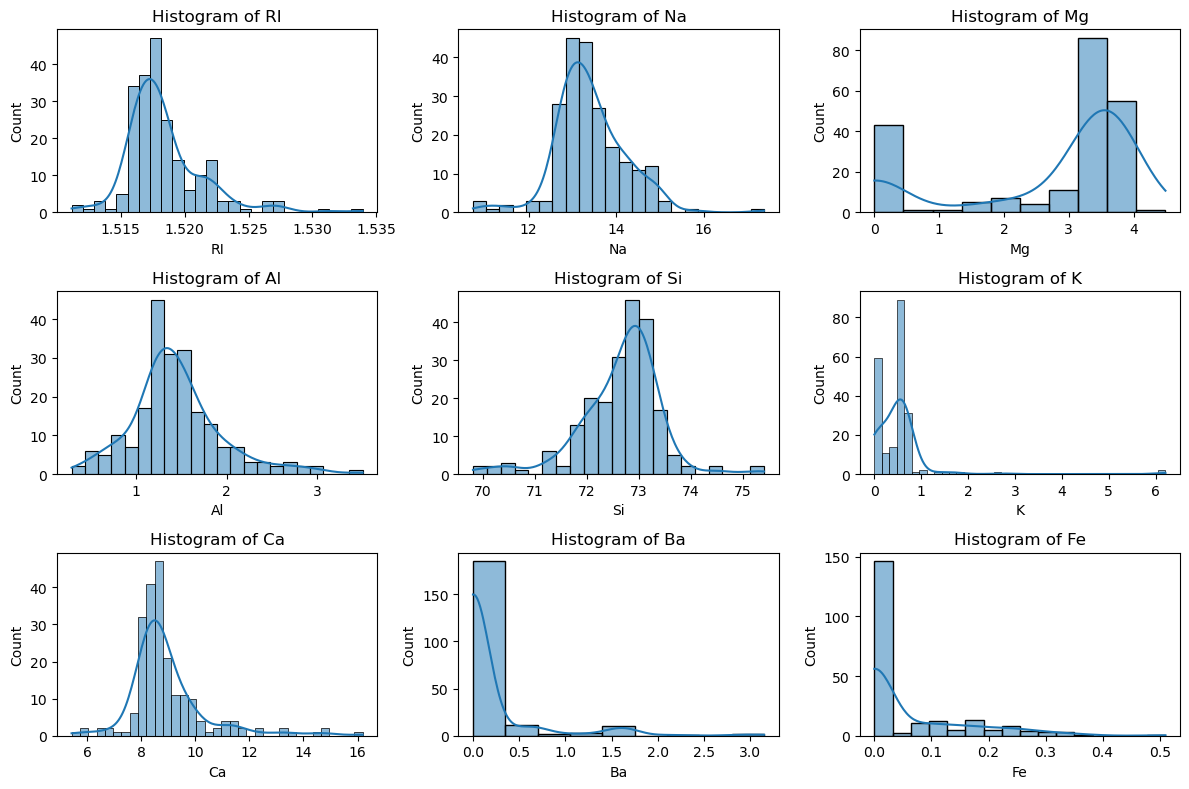

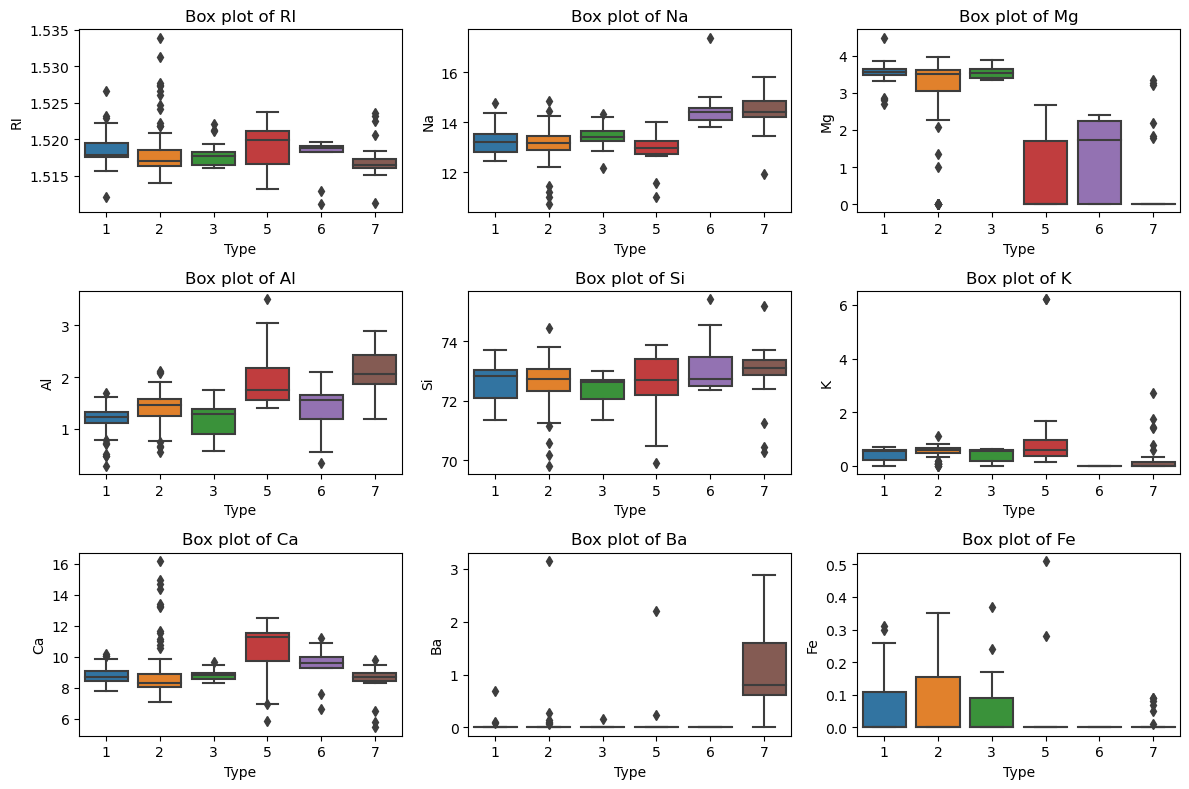

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


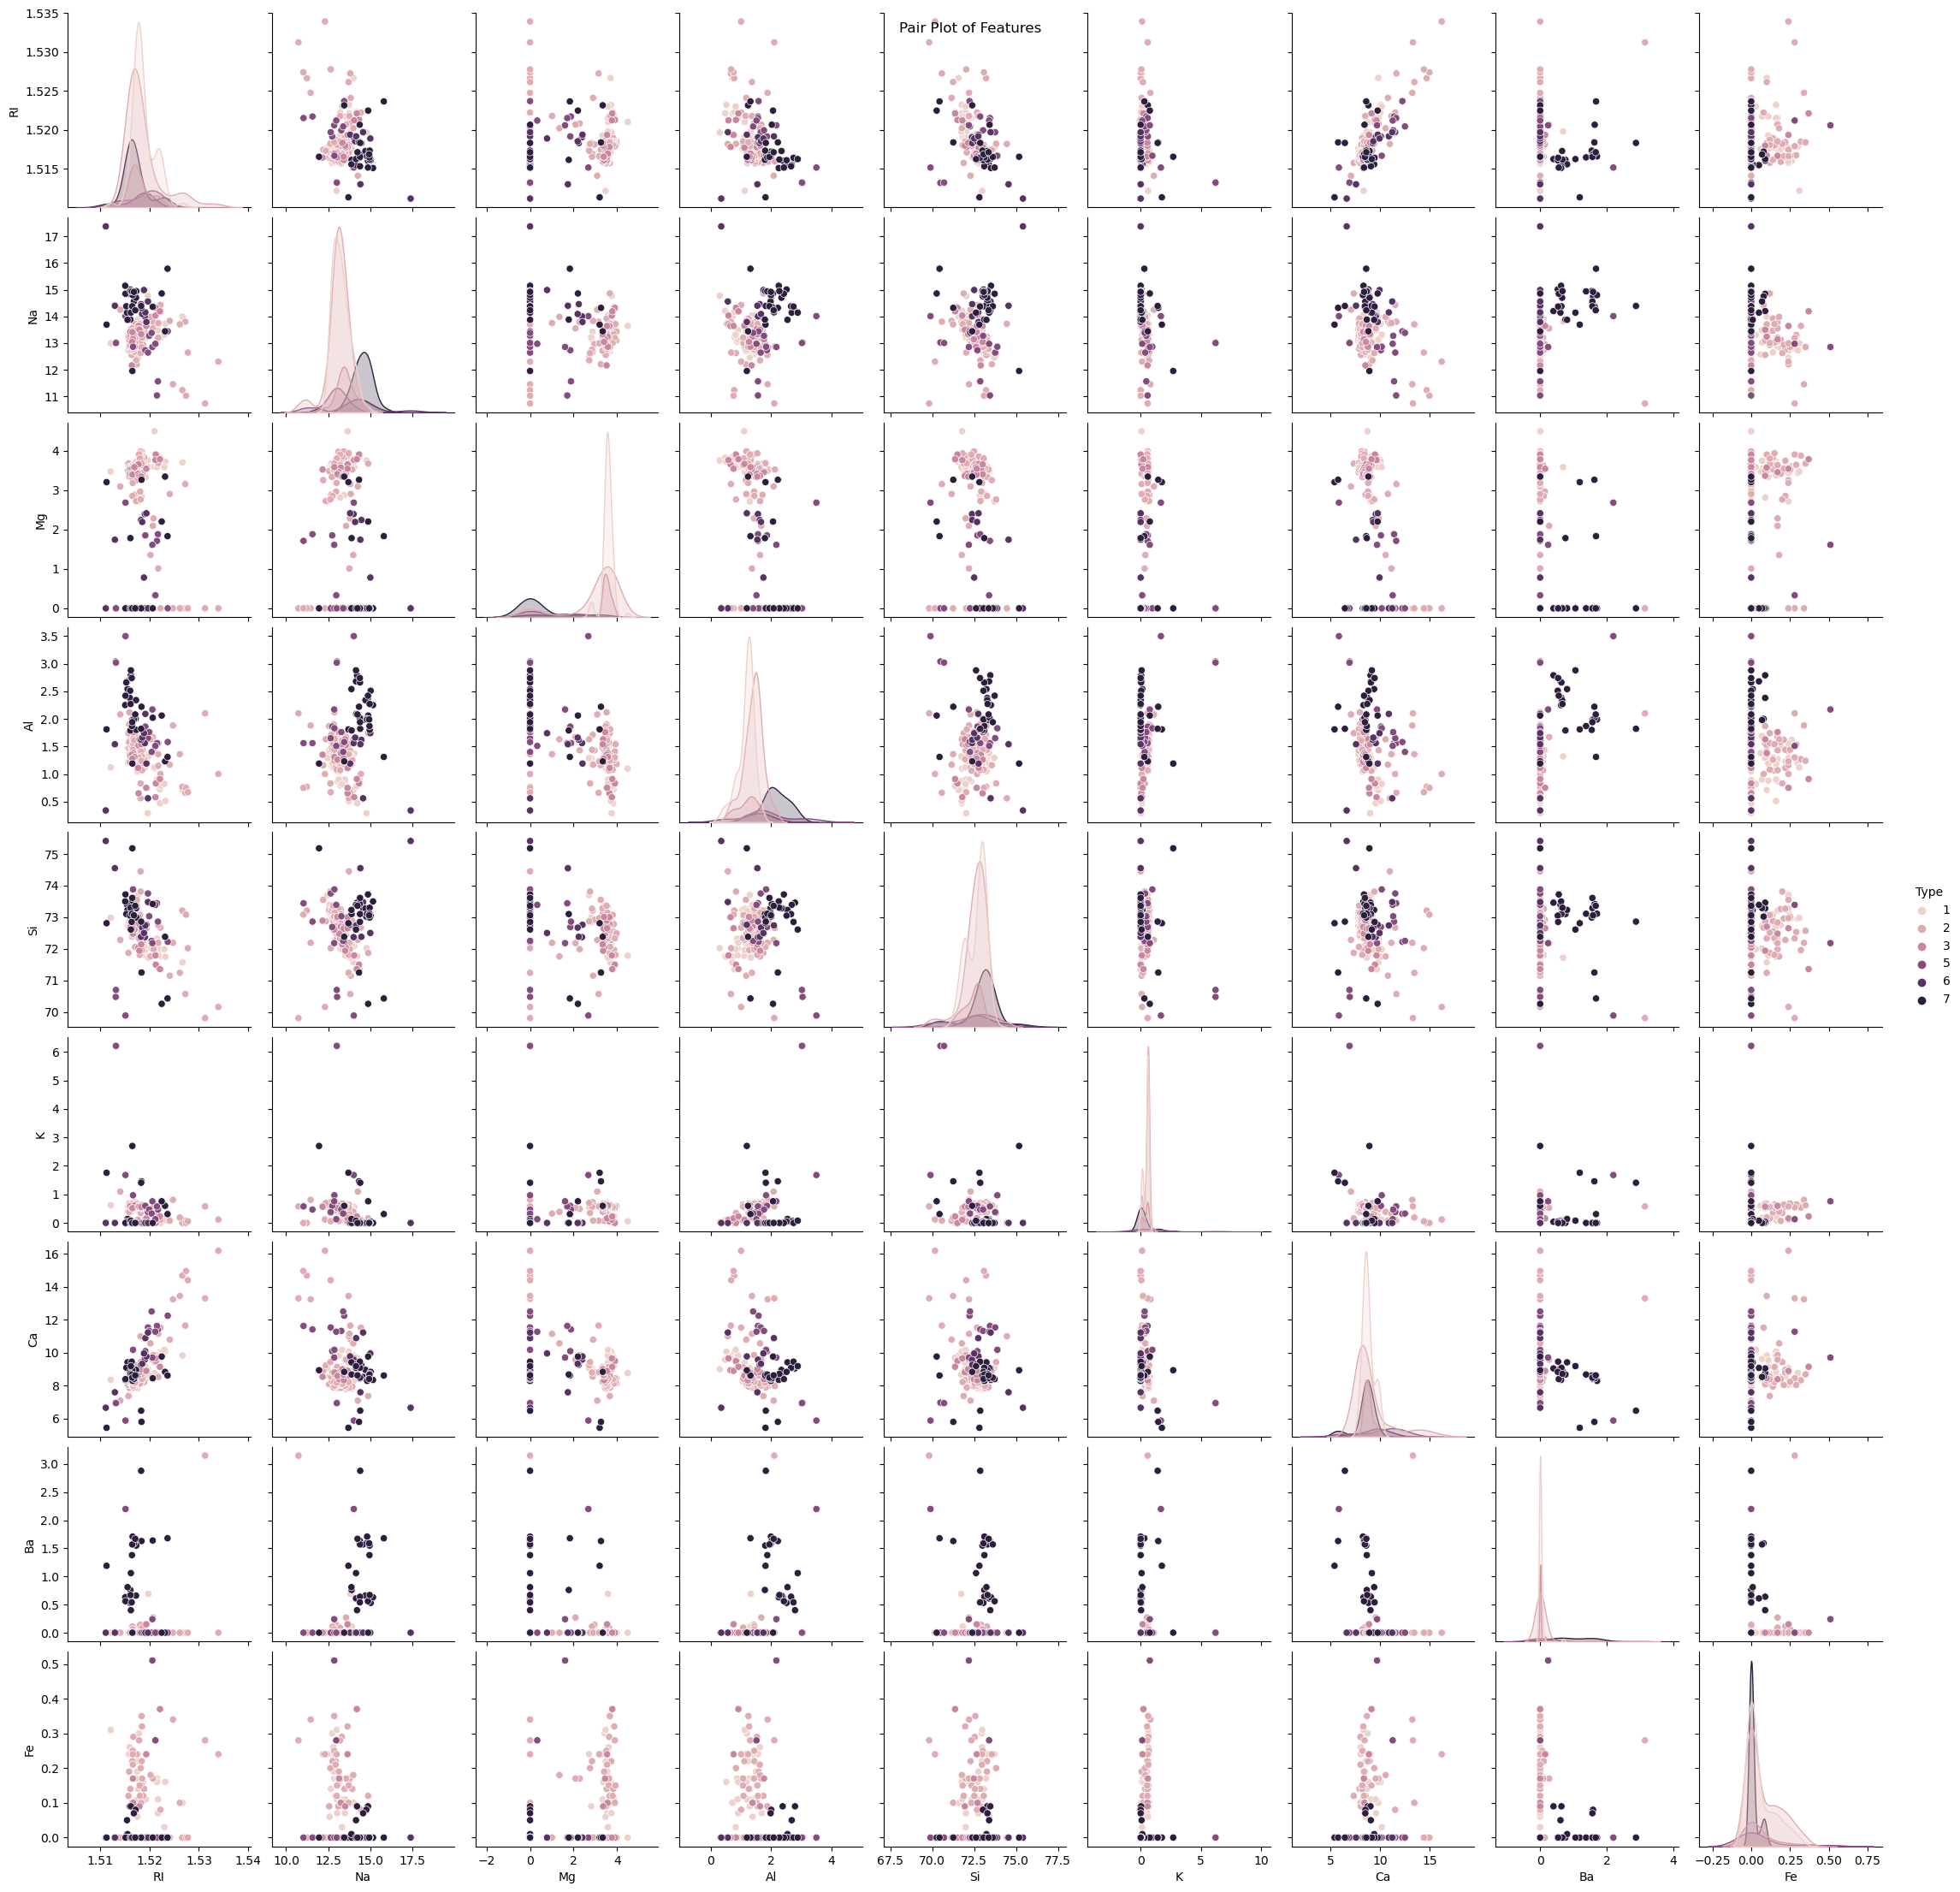

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from Excel file
glass_data = pd.read_excel("C:/Users/shiva/Downloads/Random Forest/Random Forest/glass.xlsx", sheet_name="glass")

# Visualize distributions of features using histograms
plt.figure(figsize=(12, 8))
for i, column in enumerate(glass_data.columns[:-1]):  # Exclude the last column which is the target variable
    plt.subplot(3, 3, i+1)
    sns.histplot(glass_data[column], kde=True)
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

# Visualize distributions of features using box plots
plt.figure(figsize=(12, 8))
for i, column in enumerate(glass_data.columns[:-1]):  # Exclude the last column which is the target variable
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=glass_data['Type'], y=glass_data[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

# Visualize relationships between features using pair plots
sns.pairplot(glass_data, hue='Type', diag_kind='kde')
plt.suptitle('Pair Plot of Features')
plt.show()


In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
glass_data = pd.read_excel("C:/Users/shiva/Downloads/Random Forest/Random Forest/glass.xlsx", sheet_name="glass")

# Check for missing values
missing_values = glass_data.isnull().sum()
print("Missing values:\n", missing_values)

# Splitting features and target variable
X = glass_data.drop(columns=['Type'])
y = glass_data['Type']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Missing values:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64
Accuracy: 0.8372093023255814


In [22]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into features (X) and target variable (y)
X = glass_data.drop(columns=['Type'])  # Features
y = glass_data['Type']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (171, 9) (171,)
Testing set shape: (43, 9) (43,)


In [23]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the dataset
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
column_names = ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"]
glass_data = pd.read_csv(data_url, names=column_names)

# Separate features and target variable
X = glass_data.drop(columns=["Type"])
y = glass_data["Type"]

# Define numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Define preprocessing steps for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))])

# Combine preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Build the pipeline with preprocessing and classification steps
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier())])

# Train the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
column_names = ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"]
glass_data = pd.read_csv(data_url, names=column_names)

# Separate features and target variable
X = glass_data.drop(columns=["Type"])
y = glass_data["Type"]

# Divide the data into train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_y_pred = rf_classifier.predict(X_test)

# Bagging Classifier
bagging_classifier = BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42), n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)
bagging_y_pred = bagging_classifier.predict(X_test)

# AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=42), n_estimators=50, random_state=42)
adaboost_classifier.fit(X_train, y_train)
adaboost_y_pred = adaboost_classifier.predict(X_test)

# Evaluate Random Forest Classifier
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred, average='weighted')
rf_recall = recall_score(y_test, rf_y_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_y_pred, average='weighted')

print("Random Forest Classifier Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print()

# Evaluate Bagging Classifier
bagging_accuracy = accuracy_score(y_test, bagging_y_pred)
bagging_precision = precision_score(y_test, bagging_y_pred, average='weighted')
bagging_recall = recall_score(y_test, bagging_y_pred, average='weighted')
bagging_f1 = f1_score(y_test, bagging_y_pred, average='weighted')

print("Bagging Classifier Metrics:")
print("Accuracy:", bagging_accuracy)
print("Precision:", bagging_precision)
print("Recall:", bagging_recall)
print("F1 Score:", bagging_f1)
print()

# Evaluate AdaBoost Classifier
adaboost_accuracy = accuracy_score(y_test, adaboost_y_pred)
adaboost_precision = precision_score(y_test, adaboost_y_pred, average='weighted')
adaboost_recall = recall_score(y_test, adaboost_y_pred, average='weighted')
adaboost_f1 = f1_score(y_test, adaboost_y_pred, average='weighted')

print("AdaBoost Classifier Metrics:")
print("Accuracy:", adaboost_accuracy)
print("Precision:", adaboost_precision)
print("Recall:", adaboost_recall)
print("F1 Score:", adaboost_f1)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Random Forest Classifier Metrics:
Accuracy: 0.8372093023255814
Precision: 0.866828165374677
Recall: 0.8372093023255814
F1 Score: 0.8330452594474481

Bagging Classifier Metrics:
Accuracy: 0.8604651162790697
Precision: 0.8816935002981515
Recall: 0.8604651162790697
F1 Score: 0.855389915855032

AdaBoost Classifier Metrics:
Accuracy: 0.8372093023255814
Precision: 0.8469915097822075
Recall: 0.8372093023255814
F1 Score: 0.828960679083798


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


# 1. Explain Bagging and Boosting methods. How is it different from each other.
2. Explain how to handle imbalance in the data.



In [ ]:
1. Bagging and Boosting Methods:

    - Bagging (Bootstrap Aggregating): Bagging is an ensemble method that involves training multiple individual models in parallel, each on a random subset of the training data sampled with replacement (bootstrap samples). These models are then combined by averaging (for regression) or voting (for classification) to produce the final prediction. Bagging helps reduce overfitting and variance by leveraging the wisdom of crowds. Random Forest is a popular algorithm based on bagging.
    
    - Boosting: Boosting is also an ensemble method, but it works sequentially rather than in parallel like bagging. In boosting, models are trained iteratively, with each new model attempting to correct the errors made by the previous ones. Unlike bagging, each new model in boosting is trained based on a weighted version of the training set, where more weight is given to the data points that were misclassified by earlier models. The final prediction is made by combining the predictions of all the models, with more weight given to models that perform well. AdaBoost and Gradient Boosting are popular algorithms based on boosting.

    Difference:
    - Bagging trains multiple models independently and combines them using averaging or voting, while boosting trains models sequentially, with each new model learning from the mistakes of the previous ones.
    - Bagging aims to reduce variance and prevent overfitting by averaging multiple models, while boosting aims to reduce bias and improve accuracy by focusing more on the hard-to-classify instances.

2. Handling Imbalance in Data:

    Imbalanced data occurs when one class (the minority class) is significantly underrepresented compared to the other classes (majority class) in the dataset. Here are some common techniques to handle imbalance in data:

    - Resampling Techniques:
        - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples.
        - Undersampling: Decrease the number of instances in the majority class by randomly removing samples.
        - SMOTE (Synthetic Minority Over-sampling Technique): Generate synthetic samples for the minority class based on the characteristics of existing minority instances.
        
    - Algorithmic Techniques:
        - Class Weighting: Adjust the class weights in the algorithm to give more importance to minority class samples during training.
        - Algorithm Selection: Choose algorithms that are less sensitive to class imbalance, such as decision trees, random forests, or gradient boosting.
        
    - Evaluation Metrics:
        - Instead of traditional metrics like accuracy, precision, and recall, use evaluation metrics that are more appropriate for imbalanced data, such as F1-score, precision-recall curve, ROC-AUC curve, or balanced accuracy.
        
    - Ensemble Methods:
        - Ensemble methods like bagging and boosting can also help in handling imbalanced data by combining multiple classifiers or by giving more weight to misclassified instances.
        
    It's essential to choose the appropriate technique based on the specific characteristics of the dataset and the requirements of the problem at hand.

In [ ]:
ANS 2:

To handle imbalance in the data, several techniques can be employed:

1. Resampling Techniques:
   - Oversampling: This involves increasing the number of instances in the minority class by randomly replicating them or generating synthetic samples. SMOTE (Synthetic Minority Over-sampling Technique) is a popular oversampling method that creates synthetic samples by interpolating between existing minority class instances.
   - Undersampling: This method reduces the number of instances in the majority class by randomly removing them. However, this approach may lead to loss of information as it discards potentially useful data.
   - Combining Oversampling and Undersampling: Hybrid methods combine oversampling and undersampling to mitigate their individual drawbacks. Techniques like SMOTE-ENN (SMOTE + Edited Nearest Neighbors) and SMOTE-Tomek combine SMOTE oversampling with undersampling using Tomek links or Edited Nearest Neighbors.

2. Algorithmic Techniques:
   - Some machine learning algorithms inherently handle class imbalance better than others. For example, ensemble methods like Random Forests and Gradient Boosting are robust to class imbalance because they combine predictions from multiple weak learners.
   - Another approach is to use algorithms that penalize misclassification of the minority class more than the majority class. For instance, in Support Vector Machines, the class weights can be adjusted to give higher penalties for misclassification of the minority class.